# Simple Anomaly Detection algorithm with numpy

https://medium.com/@hello.pierreportal/machine-learning-anomaly-detection-d0f8d8492975

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.style.use('ggplot')

### Get variance and mean from data set

In [2]:
def fit_p(data, m):
    mu = np.sum(data)/m
    variance = np.array([np.square(x - mu) for x in data]).sum()/m
    
    return mu, variance

### Draw <i>P</i> function

In [3]:
def p(x, mu, variance):
    std_dev = np.sqrt(variance)
    p = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(- np.square(x - mu) / (2 * variance))
    
    return p

### Functions to generate the working data set and test our anomaly detector

In [74]:
def fit_data(m, mu, var, normalize, print_data, print_p):
    
    x1 = np.random.normal(mu[0],var[0],m)
    x2 = np.random.normal(mu[1],var[1],m)
    
    if normalize:
        x1 = (x1-mu[0]) / var[0]
        x2 = (x2-mu[1]) / var[1]

    mu1, variance1 = fit_p(x1, m)
    mu2, variance2 = fit_p(x2, m)

    X = np.concatenate((x1,x2),axis=0).reshape(2,m)
    mu = np.array([mu1, mu2])
    var = np.array([variance1, variance2])
    
    p1 = p(x1, mu[0], var[0])
    p2 = p(x2, mu[1], var[1])
    
    P = p1*p2
    
    if print_data:
        plt.title("Data")
        plt.scatter(x1, x2)
        plt.show()
        
    if print_p:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d',)
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("p(X)")
        ax.plot_trisurf(x1, x2, P, cmap = plt.cm.Spectral_r)
    model = [mu, var]
      
    return X, model

def test(X, model, threshold, m_test, mu_test, var_test, normalize):
    
    mu = model[0]
    variance = model[1]
    
    plt.scatter(X[0], X[1], c = 'cyan', alpha = 0.2, marker = 'o')
    x1_test = np.random.normal(mu_test[0], var_test[0], m_test)
    x2_test = np.random.normal(mu_test[1], var_test[1], m_test)
    
    if normalize:
        x1_test = (x1_test-mu[0]) / variance[0]
        x2_test = (x2_test-mu[1]) / variance[1]
        
    X_test = np.concatenate((x1_test, x2_test),axis=0).reshape(m_test,2)
    
    for i in range(m_test):
        P = p(X_test[i][0], mu[0], variance[0]) * p(X_test[i][1], mu[1], variance[1])
        
        if P >= threshold:
            plt.scatter(X_test[i][0], X_test[i][1], c = 'green', marker = 'o') 
        else:
            plt.scatter(X_test[i][0], X_test[i][1], c = 'red', marker = 'x')
            
    plt.show()

### Generate random gaussian data

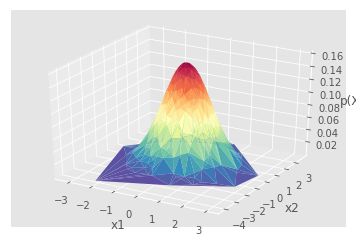

In [75]:
X_train, model = fit_data(m = 500, mu = [0.,0.], var = [.2,1.], normalize = True,
                          print_data = False, print_p = True)

### Test our anomaly detection algorithm

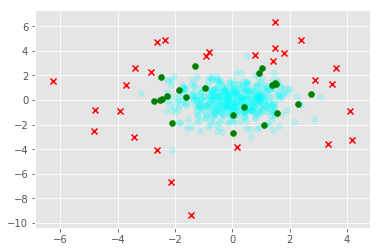

In [79]:
test(X_train, model = model, threshold = 1e-3, m_test = 50, mu_test = [0.,0.], var_test=[3.,3.], normalize = True)